In [1]:
import pandas as pd
import json

# Narrowing down to one subset of diseases

In [2]:
DATASET_PATH = '/Users/rebeccaceppas/Desktop/code/mywork/project/dataset/'

In [3]:
with open(DATASET_PATH+'release_conditions.json') as f:
   pc = json.load(f)
f.close()

possible_conditions = pd.DataFrame.from_dict(pc)

In [4]:
# Immune and Infectious Diseases

# Infectious Diseases
infectious_diseases = [
    'VIH (Primo-infection)',
    'Coqueluche',
    'Chagas',
    'Tuberculose',
    'Ebola',
    'Possible influenza ou syndrome virémique typique'
]

# Autoimmune and Inflammatory Conditions
autoimmune_and_inflammatory_conditions = [
    'Lupus érythémateux disséminé (LED)',
    'Sarcoïdose'
]

# Allergic Reactions and Related Conditions
allergic_reactions_and_related_conditions = [
    'Anaphylaxie',
    'Rhinite allergique',
    'Oedème localisé ou généralisé sans atteinte pulmonaire associée'
]

immune_infectious = infectious_diseases + autoimmune_and_inflammatory_conditions + allergic_reactions_and_related_conditions

# Making datasets only including patients with these diseases

In [5]:
train = pd.read_csv(DATASET_PATH+'release_train_patients.csv')
val = pd.read_csv(DATASET_PATH+'release_validate_patients.csv')
test = pd.read_csv(DATASET_PATH+'release_test_patients.csv')

In [6]:
train_patients = []
val_patients = []
test_patients = []

for ii in immune_infectious:
    train_patients += [ind for ind in train.PATHOLOGY[train.PATHOLOGY == ii].index.values]
    val_patients += [ind for ind in val.PATHOLOGY[val.PATHOLOGY == ii].index.values]
    test_patients += [ind for ind in test.PATHOLOGY[test.PATHOLOGY == ii].index.values]


In [7]:
# selecting new samples of patients
train_ii = train.iloc[train_patients]
valid_ii = val.iloc[val_patients]
test_ii = test.iloc[test_patients]

In [8]:
print('There are now', len(train_ii), 'patients in the training set.')
print('There are now', len(valid_ii), 'patients in the validation set.')
print('There are now', len(test_ii), 'patients in the testing set.')

There are now 203008 patients in the training set.
There are now 25399 patients in the validation set.
There are now 25689 patients in the testing set.


In [9]:
test_ii.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
46,17,"[['VIH (Primo-infection)', 0.3903549994602378]...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diarrhee', 'douleurxx...",douleurxx
114,35,"[['VIH (Primo-infection)', 0.339660592404885],...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'diarrhee', '...",fatig_ext
122,15,"[['VIH (Primo-infection)', 0.3925425839871151]...",F,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'douleurxx', ...",diaph
123,4,"[['VIH (Primo-infection)', 0.441221802327311],...",F,VIH (Primo-infection),"['adp_dlr', 'diarrhee', 'douleurxx', 'douleurx...",fievre
154,0,"[['VIH (Primo-infection)', 0.43630678617344326...",M,VIH (Primo-infection),"['adp_dlr', 'diaph', 'diarrhee', 'douleurxx', ...",adp_dlr


# Saving the data as new csv files

In [10]:
train_ii.to_csv(DATASET_PATH+'subset_train.csv', index=False)
valid_ii.to_csv(DATASET_PATH+'subset_validation.csv', index=False)
test_ii.to_csv(DATASET_PATH+'subset_test.csv', index=False)

In [12]:
test_test = pd.read_csv(DATASET_PATH+'subset_test.csv')

In [13]:
test_test.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,17,"[['VIH (Primo-infection)', 0.3903549994602378]...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diarrhee', 'douleurxx...",douleurxx
1,35,"[['VIH (Primo-infection)', 0.339660592404885],...",M,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'diarrhee', '...",fatig_ext
2,15,"[['VIH (Primo-infection)', 0.3925425839871151]...",F,VIH (Primo-infection),"['adp_dlr', 'atcd_its', 'diaph', 'douleurxx', ...",diaph
3,4,"[['VIH (Primo-infection)', 0.441221802327311],...",F,VIH (Primo-infection),"['adp_dlr', 'diarrhee', 'douleurxx', 'douleurx...",fievre
4,0,"[['VIH (Primo-infection)', 0.43630678617344326...",M,VIH (Primo-infection),"['adp_dlr', 'diaph', 'diarrhee', 'douleurxx', ...",adp_dlr


# Looking at the evidences files

In [18]:
with open(DATASET_PATH+'release_evidences.json') as f:
   pe = json.load(f)
f.close()

possible_evidences = pd.DataFrame.from_dict(pe).T

In [24]:
possible_evidences.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, fievre to J81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             223 non-null    object
 1   code_question    223 non-null    object
 2   question_fr      223 non-null    object
 3   question_en      223 non-null    object
 4   is_antecedent    223 non-null    object
 5   default_value    223 non-null    object
 6   value_meaning    223 non-null    object
 7   possible-values  223 non-null    object
 8   data_type        223 non-null    object
dtypes: object(9)
memory usage: 17.4+ KB


In [32]:
possible_evidences.sample(15)

,name,code_question,question_fr,question_en,is_antecedent,default_value,value_meaning,possible-values,data_type
ww_respi,ww_respi,ww_respi,Avez-vous une douleur qui est pire à l’inspira...,Do you have pain that is increased when you br...,False,0,{},[],B
dysp_effort,dysp_effort,dysp_effort,Vous sentez-vous facilement essoufflé à l’effort?,Do you feel out of breath with minimal physica...,False,0,{},[],B
k21,k21,k21,Avez-vous déjà reçu un diagnostic de reflux ga...,Have you ever been diagnosed with gastroesopha...,True,0,{},[],B
vo_violent,vo_violent,vo_violent,Avez-vous eu plusieurs vomissements ou fait pl...,Have you vomited several times or have you mad...,False,0,{},[],B
wheez,wheez,wheez,Avez-vous noté un un son aigu lorsque vous sor...,Have you noticed a wheezing sound when you exh...,False,0,{},[],B
hernie_hiatale,hernie_hiatale,hernie_hiatale,Avez-vous une hernie hiatale?,Do you have a hiatal hernia?,True,0,{},[],B
synd_nephro,synd_nephro,synd_nephro,Avez-vous un problème rénal qui se caractérise...,Do you have a known kidney problem resulting i...,True,0,{},[],B
obstipation,obstipation,obstipation,Passez-vous des selles ou des gaz depuis que v...,Have you been able to pass stools or gas since...,False,0,{},[],B
B34.9,B34.9,B34.9,Avez-vous été infecté par un virus récemment?,Have you recently had a viral infection?,True,0,{},[],B
trav1,trav1,trav1,Avez-vous voyagé dans les 4 dernières semaines?,Have you traveled out of the country in the la...,True,N,"{'N': {'fr': 'N', 'en': 'N'}, 'AfriqN': {'fr':...","[N, AfriqN, AfriqO, AfriqSS, AmerC, AmerN, Ame...",C


In [37]:
possible_evidences.loc['douleurxx_irrad']['possible-values']

['nulle_part',
 'aile_iliaque_D_',
 'aile_iliaque_G_',
 'aine_D_',
 'aine_G_',
 'aisselle_D_',
 'aisselle_G_',
 'amygdale_D_',
 'amygdale_G_',
 'anus',
 'arrière_de_la_cheville_D_',
 'arrière_de_la_cheville_G_',
 'arrière_de_tête',
 'arrière_du_cou',
 'avant-bras_D_',
 'avant-bras_G_',
 'bas_du_thorax',
 'biceps_D_',
 'biceps_G_',
 'bouche',
 'cartilage_thyroidien',
 'cheville_D_',
 'cheville_G_',
 'clitoris',
 'coccyx',
 'colonne_cervicale',
 'colonne_dorsale',
 'colonne_lombaire',
 'commissure_D_',
 'commissure_G_',
 'coté_lateral_du_pied_D_',
 'coté_lateral_du_pied_G_',
 'coude_D_',
 'coude_G_',
 'creux_poplité_D_',
 'creux_poplité_G_',
 'crête_iliaque_D_',
 'crête_iliaque_G_',
 'cuisse_D_',
 'cuisse_G_',
 'côté_du_cou_D_',
 'côté_du_cou_G_',
 'côté_du_thorax_D_',
 'côté_du_thorax_G_',
 'dents_inférieures_D_',
 'dents_inférieures_G_',
 'dents_supérieures_D_',
 'dents_supérieures_G_',
 'dessus_de_la_langue',
 'dessus_de_tête',
 'doigt_annulaire__D_',
 'doigt_annulaire__G_',
 'doigt_a

In [42]:
len(set(possible_evidences.loc['douleurxx_irrad']['possible-values']))

165

#### Note: we found that there are 223 different symptoms and for the multi-choice evidences there would be multiple columns for each containing 0 or 1 for selecting one of the choices. If we have some multi-choice options with a lot of options (like the one above with 165 options), this could get out of hand.

#### Posisble idea: make it so that all multi-choice options are now binary so that they are 1 of any of the options are selected and 0 if none of them are.

# Looking at categorical features

For the ones with numbers, leave the columns as it is. For N,O questions, keep binary. For skin rash color make 5 separate columns for 6 options. For travel out of country, make it binary.

In [59]:
possible_evidences[possible_evidences.data_type == 'C']

,name,code_question,question_fr,question_en,is_antecedent,default_value,value_meaning,possible-values,data_type
douleurxx_soudain,douleurxx_soudain,douleurxx,À quelle vitesse la douleur est-elle apparue ?,How fast did the pain appear?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
douleurxx_intens,douleurxx_intens,douleurxx,Quelle est l’intensité de la douleur?,How intense is the pain?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
douleurxx_precis,douleurxx_precis,douleurxx,À quel point la douleur est-elle précisément l...,How precisely is the pain located?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_couleur,lesions_peau_couleur,lesions_peau,De quelle couleur sont les lésions?,What color is the rash?,False,NA,"{'NA': {'fr': 'NA', 'en': 'NA'}, 'foncee': {'f...","[NA, foncee, jaune, pale, rose, rouge]",C
lesions_peau_intens,lesions_peau_intens,lesions_peau,Quelle est l’intensité de la douleur causée pa...,How intense is the pain caused by the rash?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_elevee,lesions_peau_elevee,lesions_peau,La ou les lésions sont-elles surélevées?,Is the rash swollen?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_prurit,lesions_peau_prurit,lesions_peau,Quel est le niveau de la démangeaisons?,How severe is the itching?,False,0,{},"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",C
lesions_peau_plusqu1cm,lesions_peau_plusqu1cm,lesions_peau,Est-ce que la ou les lésions sont plus grande ...,Is the lesion (or are the lesions) larger than...,False,N,"{'N': {'fr': 'N', 'en': 'N'}, 'O': {'fr': 'O',...","[N, O]",C
lesions_peau_desquame,lesions_peau_desquame,lesions_peau,Est-ce que vos lésions pèlent (morceaux de pea...,Do your lesions peel off?,False,N,"{'N': {'fr': 'N', 'en': 'N'}, 'O': {'fr': 'O',...","[N, O]",C
trav1,trav1,trav1,Avez-vous voyagé dans les 4 dernières semaines?,Have you traveled out of the country in the la...,True,N,"{'N': {'fr': 'N', 'en': 'N'}, 'AfriqN': {'fr':...","[N, AfriqN, AfriqO, AfriqSS, AmerC, AmerN, Ame...",C


# Looking at multi-choice features

Group the body parts so we have less columns.

In [60]:
possible_evidences[possible_evidences.data_type == 'M']


,name,code_question,question_fr,question_en,is_antecedent,default_value,value_meaning,possible-values,data_type
douleurxx_endroitducorps,douleurxx_endroitducorps,douleurxx,Avez-vous de la douleur quelque part?,Do you feel pain somewhere?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
douleurxx_irrad,douleurxx_irrad,douleurxx,Est-ce que la douleur se propage vers un autre...,Does the pain radiate to another location?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
douleurxx_carac,douleurxx_carac,douleurxx,Caractérisez votre douleur:,Characterize your pain:,False,NA,"{'NA': {'fr': 'NA', 'en': 'NA'}, 'déchirante':...","[NA, déchirante, lancinante_/_choc_électrique,...",M
lesions_peau_endroitducorps,lesions_peau_endroitducorps,lesions_peau,À quel endroit est situé chaque lésion?,Where is the affected region located?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M
oedeme_endroitducorps,oedeme_endroitducorps,oedeme,À quel endroit est situé l’enflure?,Where is the swelling located?,False,nulle_part,"{'nulle_part': {'fr': 'nulle part', 'en': 'now...","[nulle_part, aile_iliaque_D_, aile_iliaque_G_,...",M


In [81]:
possible_evidences[possible_evidences.data_type == "M"]['possible-values'].iloc[0]

['nulle_part',
 'aile_iliaque_D_',
 'aile_iliaque_G_',
 'aine_D_',
 'aine_G_',
 'aisselle_D_',
 'aisselle_G_',
 'amygdale_D_',
 'amygdale_G_',
 'anus',
 'arrière_de_la_cheville_D_',
 'arrière_de_la_cheville_G_',
 'arrière_de_tête',
 'arrière_du_cou',
 'avant-bras_D_',
 'avant-bras_G_',
 'bas_du_thorax',
 'biceps_D_',
 'biceps_G_',
 'bouche',
 'cartilage_thyroidien',
 'cheville_D_',
 'cheville_G_',
 'clitoris',
 'coccyx',
 'colonne_cervicale',
 'colonne_dorsale',
 'colonne_lombaire',
 'commissure_D_',
 'commissure_G_',
 'coté_lateral_du_pied_D_',
 'coté_lateral_du_pied_G_',
 'coude_D_',
 'coude_G_',
 'creux_poplité_D_',
 'creux_poplité_G_',
 'crête_iliaque_D_',
 'crête_iliaque_G_',
 'cuisse_D_',
 'cuisse_G_',
 'côté_du_cou_D_',
 'côté_du_cou_G_',
 'côté_du_thorax_D_',
 'côté_du_thorax_G_',
 'dents_inférieures_D_',
 'dents_inférieures_G_',
 'dents_supérieures_D_',
 'dents_supérieures_G_',
 'dessus_de_la_langue',
 'dessus_de_tête',
 'doigt_annulaire__D_',
 'doigt_annulaire__G_',
 'doigt_a

In [84]:
body_parts_dict = {
    'head': ['arrière_de_tête', 'dessus_de_tête', 'front', 'menton', 'occiput', 'tempe_D_', 'tempe_G_'],
    'face': ['oreille_D_', 'oreille_G_', 'oeil_D_', 'oeil_G_', 'nez', 'lèvre_inferieure_D_', 'lèvre_supérieure_D_', 'joue_D_', 'joue_G_', 'vermillon_D_', 'vermillon_G_'],
    'mouth': ['bouche', 'dents_inférieures_D_', 'dents_inférieures_G_', 'dents_supérieures_D_', 'dents_supérieures_G_', 'gencive_inférieure', 'gencive_supérieure', 'luette', 'palais', 'sous_la_langue', 'joue_interne_D_', 'joue_interne_G_', 'amygdale_D_', 'amygdale_G_'],
    'neck_throat': ['arrière_du_cou', 'côté_du_cou_D_', 'côté_du_cou_G_', 'cartilage_thyroidien', 'pharynx', 'trachée'],
    'thorax': ['bas_du_thorax', 'côté_du_thorax_D_', 'côté_du_thorax_G_', 'haut_du_thorax', 'thorax_postérieur_D_', 'thorax_postérieur_G_', 'ventre', 'épigastre', 'flanc_D_', 'flanc_G_', 'hypochondre_D_', 'hypochondre_G_'],
    'pelvis_hips': ['aine_D_', 'aine_G_', 'fosse_iliaque_D_', 'fosse_iliaque_G_', 'crête_iliaque_D_', 'crête_iliaque_G_', 'hanche_D_', 'hanche_G_', 'coccyx', 'aile_iliaque_D_', 'aile_iliaque_G_'],
    'upper_limb': ['avant-bras_D_', 'avant-bras_G_', 'biceps_D_', 'biceps_G_', 'coude_D_', 'coude_G_', 'doigt_annulaire__D_', 'doigt_annulaire__G_', 'doigt_auriculaire__D_', 'doigt_auriculaire__G_', 'doigt_index__D_', 'doigt_index__G_', 'doigt_majeur__D_', 'doigt_majeur__G_', 'épaule_D_', 'épaule_G_', 'face_dorsale_du_poignet_D_', 'face_dorsale_du_poignet_G_', 'face_palmaire_de_l_avant-bras_D_', 'face_palmaire_de_l_avant-bras_G_', 'face_palmaire_du_poignet_D_', 'face_palmaire_du_poignet_G_', 'paume_D_', 'paume_G_', 'pouce_D_', 'pouce_G_', 'trapèze_D_', 'trapèze_G_', 'triceps_D_', 'triceps_G_', 'aisselle_D_', 'aisselle_G_'],
    'lower_limb': ['cheville_D_', 'cheville_G_', 'cuisse_D_', 'cuisse_G_', 'genou_D_', 'genou_G_', 'ischio_D_', 'ischio_G_', 'mollet_D_', 'mollet_G_', 'pied_D_', 'pied_G_', 'gros_orteil_D_', 'gros_orteil_G_', 'orteil__1__D_', 'orteil__1__G_', 'orteil__2__D_', 'orteil__2__G_', 'orteil__3__D_', 'orteil__3__G_', 'petit_orteil__4__D_', 'petit_orteil__4__G_', 'talon_D_', 'talon_G_', 'fesse_D_', 'fesse_G_'],
    'back': ['colonne_cervicale', 'colonne_dorsale', 'colonne_lombaire'],
    'organs': ['clitoris', 'hymen', 'paroi_vaginale_D_', 'paroi_vaginale_G_', 'vagin', 'vestibule', 'pénis', 'scrotum', 'testicule_D_', 'testicule_G_', 'loges_renales_D_', 'loges_renales_G_', 'anus'],
}


# Clean dataset

In [1]:
from disease_prediction.data import datasets as ds
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 100

In [2]:
df = ds.load_datasets(subsets=['train', 'test', 'validate'], directory='/Users/rebeccaceppas/Desktop/code/disease_prediction/disease_prediction/data/')
df_train = df['train']
df_val = df['validate']
df_test = df['test']

# Examining training data

In [3]:
df_train.info()

<class 'disease_prediction.data.datasets.DiagDataFrame'>
Index: 203008 entries, 1 to 1023494
Data columns (total 94 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   AGE                     203008 non-null  int64 
 1   SEX                     203008 non-null  object
 2   PATHOLOGY               203008 non-null  object
 3   INITIAL_EVIDENCE        203008 non-null  object
 4   swollen_nodes           203008 non-null  int64 
 5   std                     203008 non-null  int64 
 6   sweating                203008 non-null  int64 
 7   diarrhea                203008 non-null  int64 
 8   pain                    203008 non-null  int64 
 9   pain_char               203008 non-null  object
 10  pain_somewhere          203008 non-null  object
 11  pain_intensity          203008 non-null  int64 
 12  pain_radiate            203008 non-null  object
 13  pain_precise            203008 non-null  int64 
 14  pain_sudden          

# Age

- People of age 109 for every disease?
- People of age 0?
- Age distribution is odd - we should investigate what is going on.
- Mean age does not seem too different between all 11 diseases.

In [4]:
df_train.groupby('PATHOLOGY')['AGE'].mean()

PATHOLOGY
Allergic sinusitis         39.354769
Anaphylaxis                37.686125
Chagas                     38.816688
Ebola                      37.869081
HIV (initial infection)    37.610416
Influenza                  36.408213
Localized edema            37.477305
SLE                        37.179742
Sarcoidosis                37.811416
Tuberculosis               37.499846
Whooping cough             38.961614
Name: AGE, dtype: float64

In [5]:
df_train.AGE.max(), df_train.AGE.mean(), df_train.AGE.min()

(109, 37.75222158732661, 0)

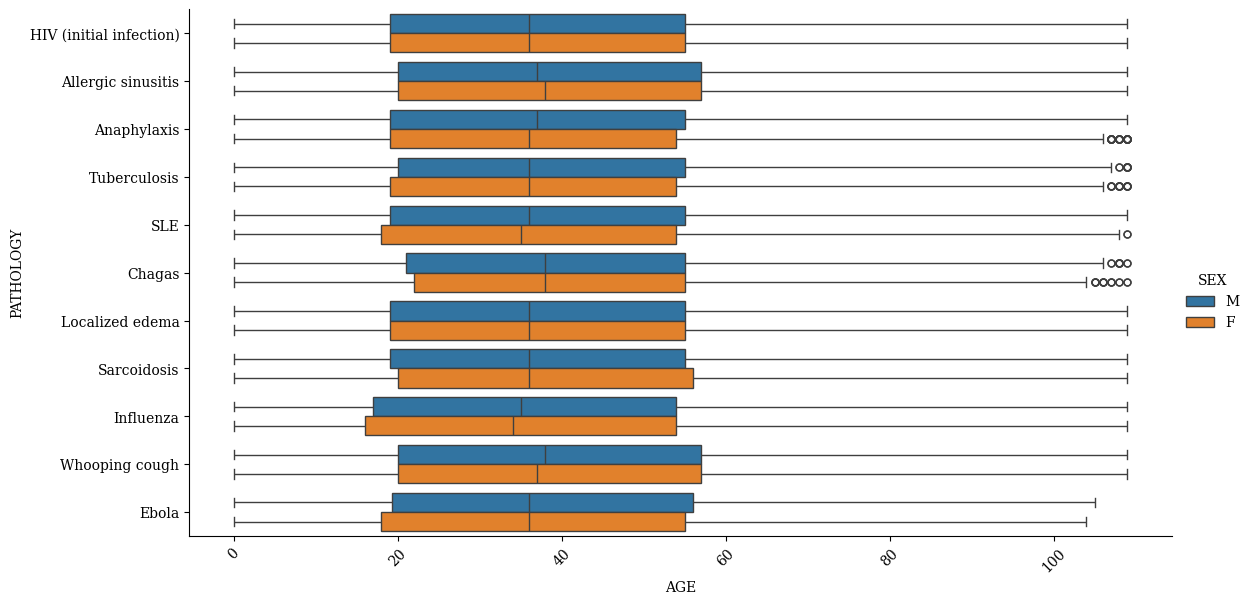

In [6]:
sns.catplot(data=df_train,
             y="PATHOLOGY", x="AGE",
             kind='box', hue='SEX',
             height=6, aspect=2)

plt.xticks(rotation=45)
plt.show()


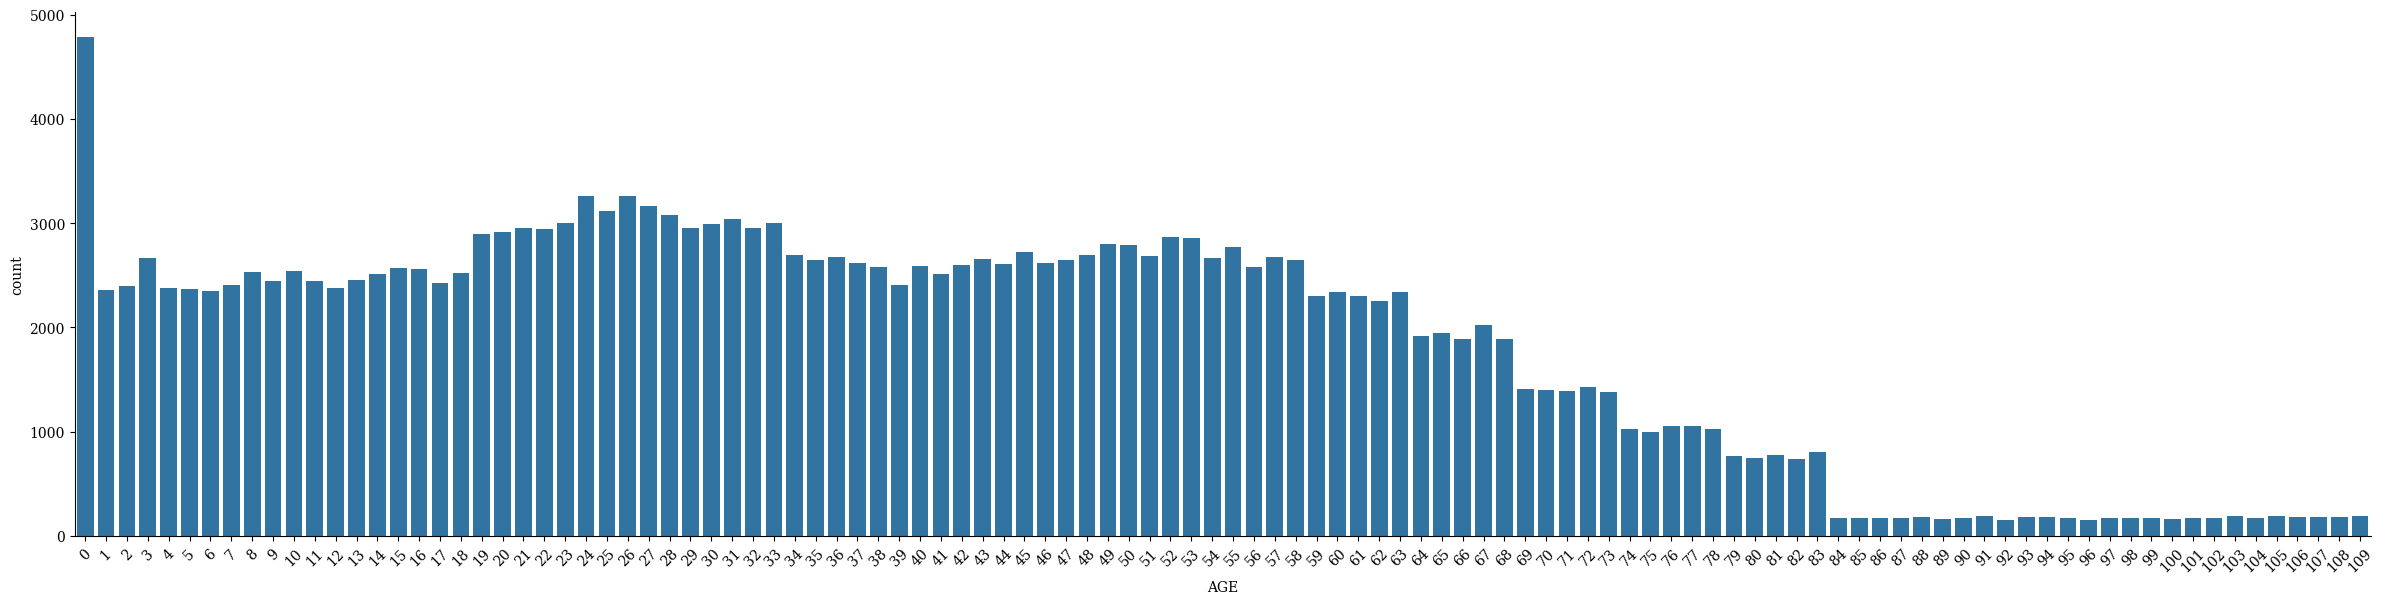

In [7]:
sns.catplot(df_train,
            x='AGE',
            kind='count',
            height=6,
            aspect=4)

plt.xticks(rotation=45)
plt.show()

# Sex

- There is a 52% female population in the dataset vs 48% male.
- The number of patients with Chaga seem to be slightly skewed towards a female population.
- There is a very small number of patients with Ebola. Is that a problem? It is behaving weirdly in some of the plots I've been making as well.

In [8]:
df_train.SEX.value_counts(normalize=True)

SEX
F    0.517078
M    0.482922
Name: proportion, dtype: float64

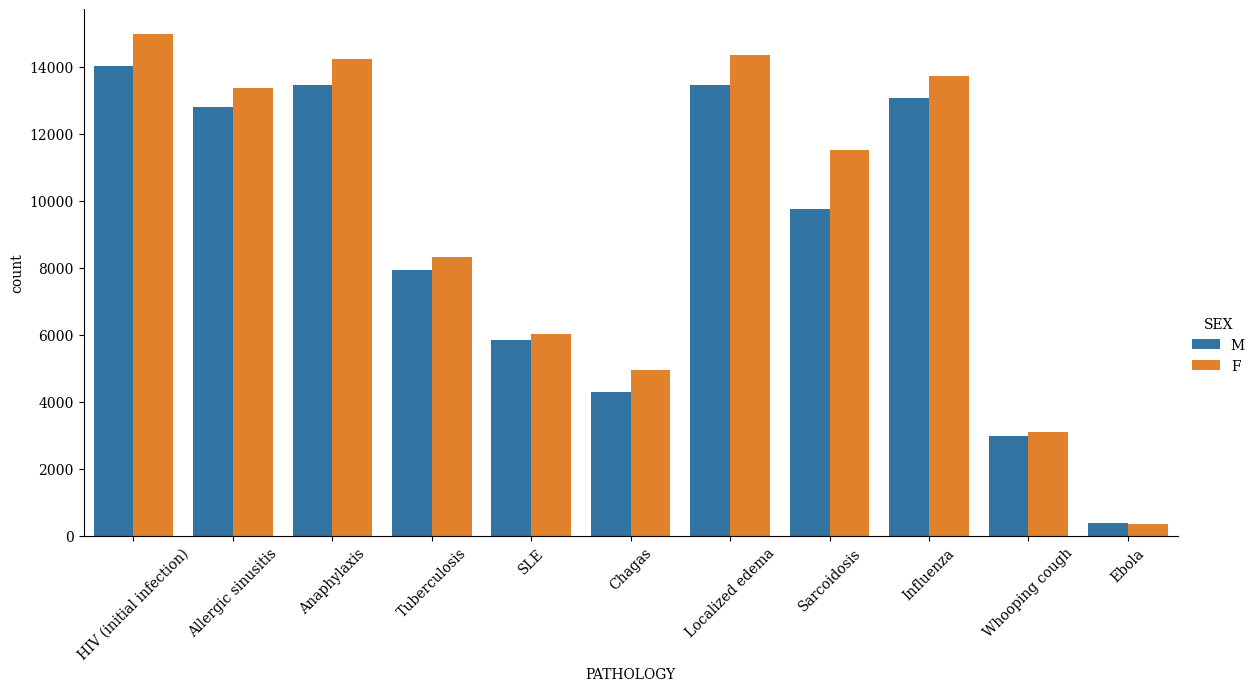

In [9]:
sns.catplot(df_train,
            x='PATHOLOGY',
            kind='count',
            hue='SEX',
            height=6,
            aspect=2)
plt.xticks(rotation=45)
plt.show()

In [10]:
# getting the mean difference in counts for all diseases between male and female patients
# to see if there is some interesting trend after accounting for the unbalanced numbers

m_path_counts = df_train.loc[df_train.SEX == 'M'].PATHOLOGY.value_counts().values
f_path_counts = df_train.loc[df_train.SEX == 'F'].PATHOLOGY.value_counts().values

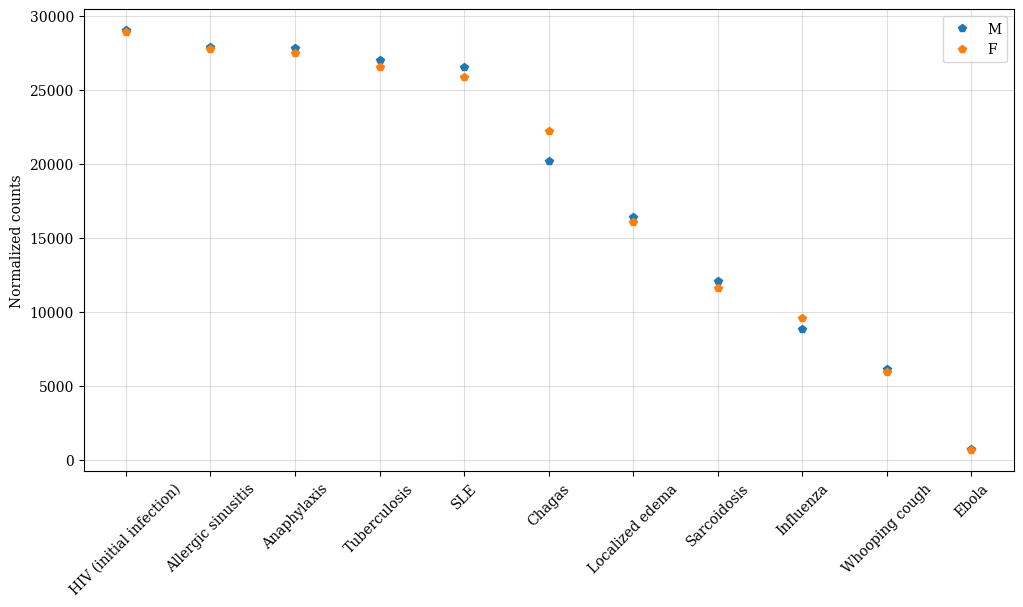

In [11]:
F = 0.517078
M = 1 - F

plt.plot(df_train.PATHOLOGY.unique(), m_path_counts/M, 'p', label='M')
plt.plot(df_train.PATHOLOGY.unique(), f_path_counts/F, 'p', label='F')

plt.xticks(rotation=45)
plt.ylabel('Normalized counts')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Initial evidence

- There are a lot of conditions that first presented with pain as a first evidence.
- Some symptoms (ex: eye itching, new fatigue) are present only for a single disease and have very clear predictive power.
- I think the initial evidence data might end up doing a lot of the heavy lifting in the model.

In [12]:
df_train.INITIAL_EVIDENCE.unique().size

38

In [13]:
df_train.INITIAL_EVIDENCE.value_counts(normalize=True)

INITIAL_EVIDENCE
pain                  0.162240
swelling              0.072170
lesions               0.065628
cough                 0.061372
short_breath          0.054811
runny_nose            0.051461
fever                 0.048698
swollen_nodes         0.037102
itchy_nose            0.034363
eye_itching           0.029620
gained_weight         0.027570
nausea                0.026240
diarrhea              0.025723
weight_loss           0.024501
fatigue_ext           0.024083
sweating              0.022176
muscle_pain           0.021704
sore_throat           0.019521
cough_blood           0.017689
vomiting_cough        0.014975
convulsion            0.014354
red_eye               0.014290
contact_allergy       0.013325
vag_discharge         0.011246
chills                0.010990
dizziness             0.010660
lost_consciousness    0.010211
stridor               0.010064
wheezing_exhale       0.009640
lost_appetite         0.009492
ulcers                0.009167
fatigue               

In [14]:
pivot_table = pd.pivot_table(data=df_train, index='INITIAL_EVIDENCE', columns='PATHOLOGY', aggfunc='size', fill_value=0)

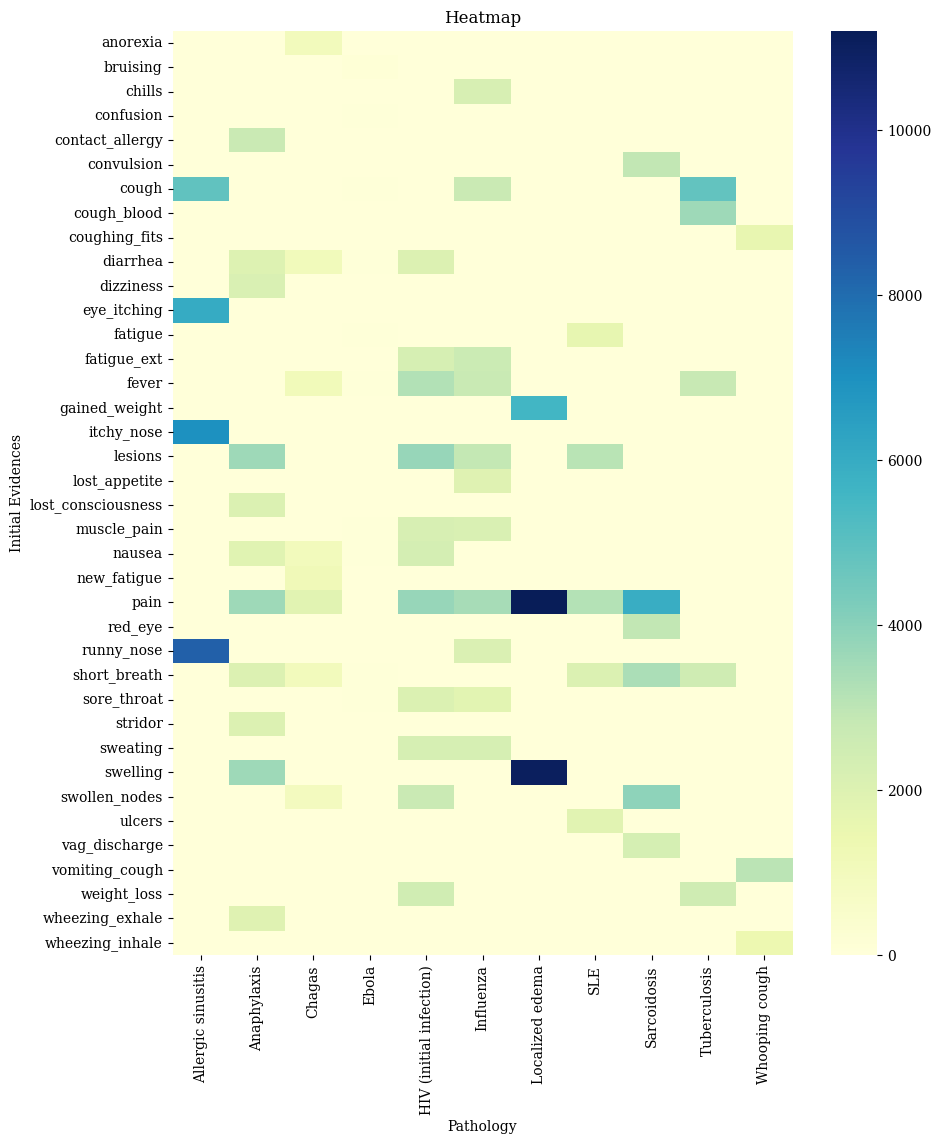

In [15]:

# Create a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(pivot_table, annot=False, fmt='d', cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel('Pathology')
plt.ylabel('Initial Evidences')
plt.show()

# Other symptoms

- lesions peeling is N for all of our diseases in the training set. Also, Y or N - should convert into binary?
- similar for some of the other symptoms.

In [16]:
df_train.columns

Index(['AGE', 'SEX', 'PATHOLOGY', 'INITIAL_EVIDENCE', 'swollen_nodes', 'std',
       'sweating', 'diarrhea', 'pain', 'pain_char', 'pain_somewhere',
       'pain_intensity', 'pain_radiate', 'pain_precise', 'pain_sudden',
       'fever', 'unprotected_sex', 'lesions', 'lesion_color',
       'lesions_peeling', 'lesion_pain_swollen', 'lesion_location',
       'lesion_pain_intense', 'lesion_larger_than_1cm', 'itching_severity',
       'nausea', 'weight_loss', 'sex_hiv', 'trav1', 'fam_allergies', 'fam_j45',
       'j45', 'itchy_nose', 'eye_itching', 'runny_nose', 'urban1',
       'severe_allergy', 'contact_allergy', 'short_breath', 'swelling',
       'swelling_location', 'lost_consciousness', 'stridor', 'z84.89', 'HIV',
       'cortico', 'IV_drugs', 'e10_e11', 'f10.129', 'cough', 'cough_blood',
       'v85.0', 'I30', 'f17.210', 'high_bp', 'ulcers', 'anorexia',
       'new_fatigue', 'nsaids', 'i50', 'i80', 'lymph_surg', 'synd_nephro',
       'convulsion', 'e66', 'red_eye', 'agri', 'gained_weig

In [17]:
nonbinary = ['AGE',
            'SEX',
            'INITIAL_EVIDENCE',
            'pain_char', 
            'pain_somewhere', 
            'pain_intensity', 
            'pain_radiate',
            'pain_precise',
            'pain_sudden',
            'lesion_color',
            'lesions_peeling',
            'lesion_pain_swollen',
            'lesion_larger_than_1cm',
            'lesion_location',
            'lesion_pain_intense',
            'itching_severity',
            'trav1',
            'swelling_location']
binary_symptoms = [bs for bs in df_train.columns.values if bs not in nonbinary]

In [18]:
df_melted = df_train[binary_symptoms].melt(id_vars='PATHOLOGY', var_name='SYMPTOM', value_name='PRESENCE')
df_present = df_melted[df_melted['PRESENCE'] == 1]
pivot_table_symptoms = df_present.pivot_table(index='SYMPTOM', columns='PATHOLOGY', aggfunc='size', fill_value=0)


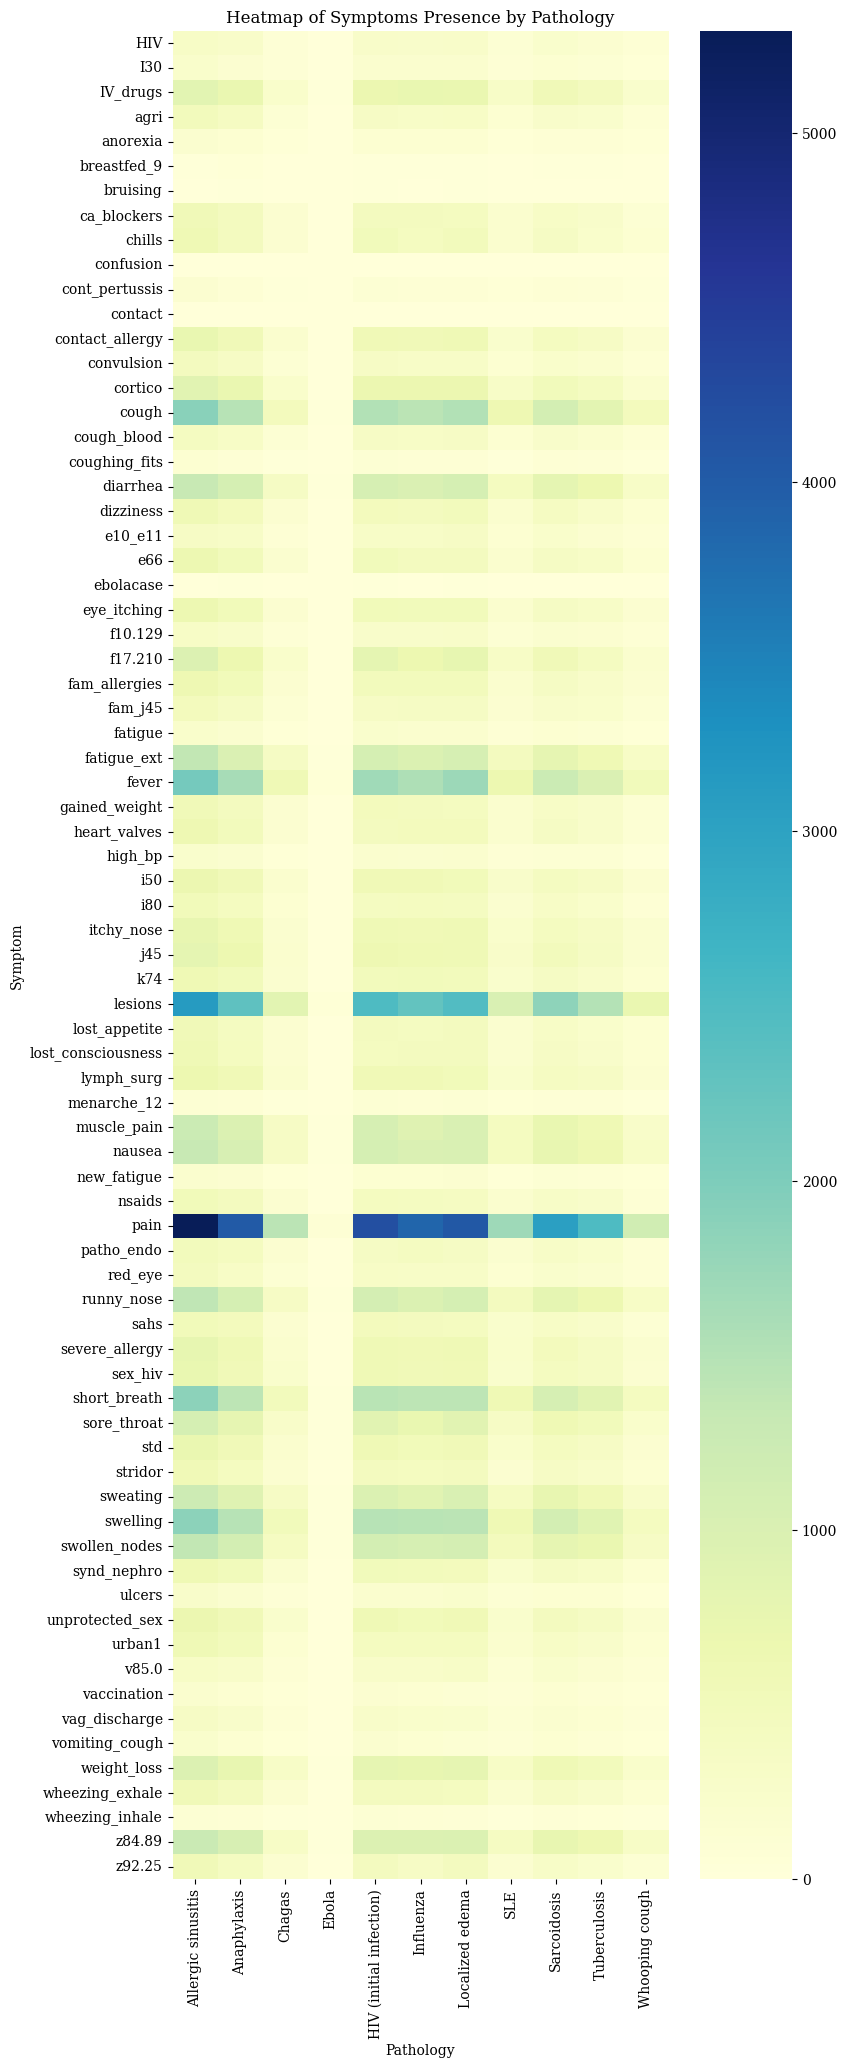

In [19]:
plt.figure(figsize=(8, 24))
sns.heatmap(pivot_table_symptoms, annot=False, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Symptoms Presence by Pathology')
plt.ylabel('Symptom')
plt.xlabel('Pathology')
plt.show()

In [20]:
symptom_totals = pivot_table_symptoms.sum(axis=1)
disease_totals = pivot_table_symptoms.sum(axis=0)

## Normalize the pivot table by the total counts of each symptom and disease
normalized_pivot_table = pivot_table_symptoms.div(symptom_totals, axis=0)
normalized_pivot_table = normalized_pivot_table.div(disease_totals, axis=1)

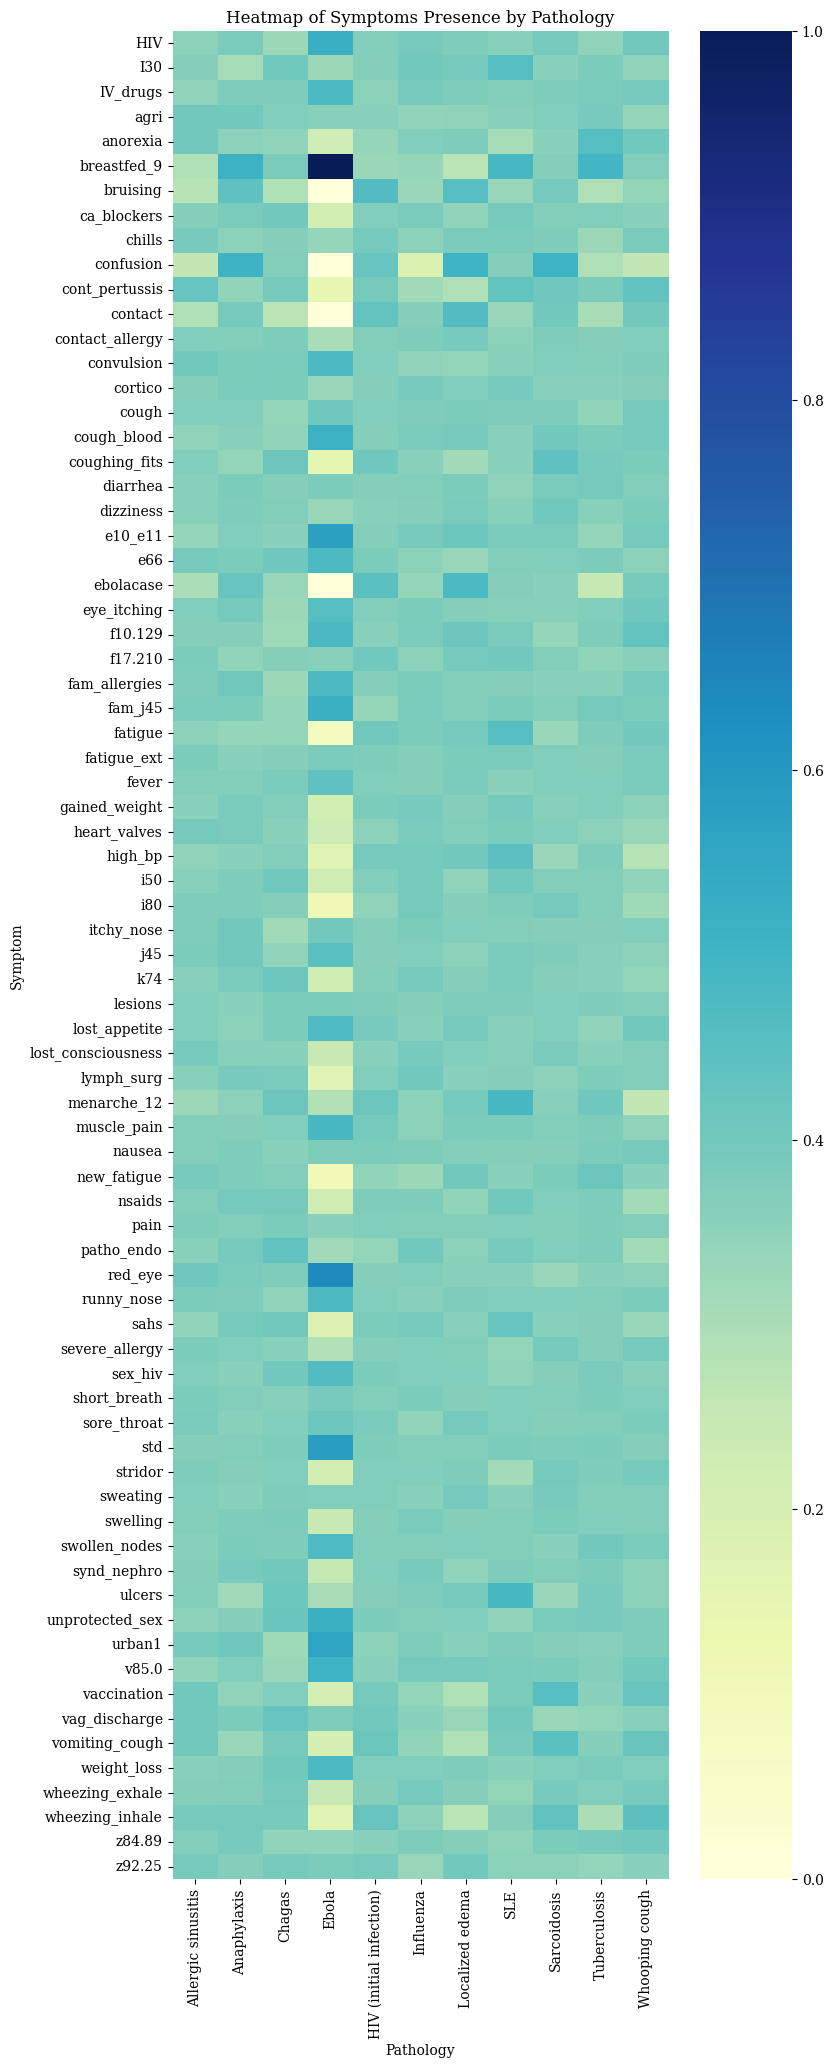

In [21]:
plt.figure(figsize=(8, 24))
sns.heatmap(normalized_pivot_table / np.max(normalized_pivot_table), annot=False, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Symptoms Presence by Pathology')
plt.ylabel('Symptom')
plt.xlabel('Pathology')
plt.show()

Without ebola

In [22]:
no_ebola = df_train[df_train['PATHOLOGY'] != 'Ebola']

df_melted_e = no_ebola[binary_symptoms].melt(id_vars='PATHOLOGY', var_name='SYMPTOM', value_name='PRESENCE')
df_present_e = df_melted_e[df_melted['PRESENCE'] == 1]
pivot_table_symptoms_e = df_present_e.pivot_table(index='SYMPTOM', columns='PATHOLOGY', aggfunc='size', fill_value=0)

symptom_totals_e = pivot_table_symptoms_e.sum(axis=1)
disease_totals_e = pivot_table_symptoms_e.sum(axis=0)

## Normalize the pivot table by the total counts of each symptom and disease
normalized_pivot_table_e = pivot_table_symptoms_e.div(symptom_totals_e, axis=0)
normalized_pivot_table_e = normalized_pivot_table_e.div(disease_totals_e, axis=1)

/var/folders/rw/43dtvf4s1cg4s4rbh9cx59240000gn/T/ipykernel_59635/1287833387.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_present_e = df_melted_e[df_melted['PRESENCE'] == 1]


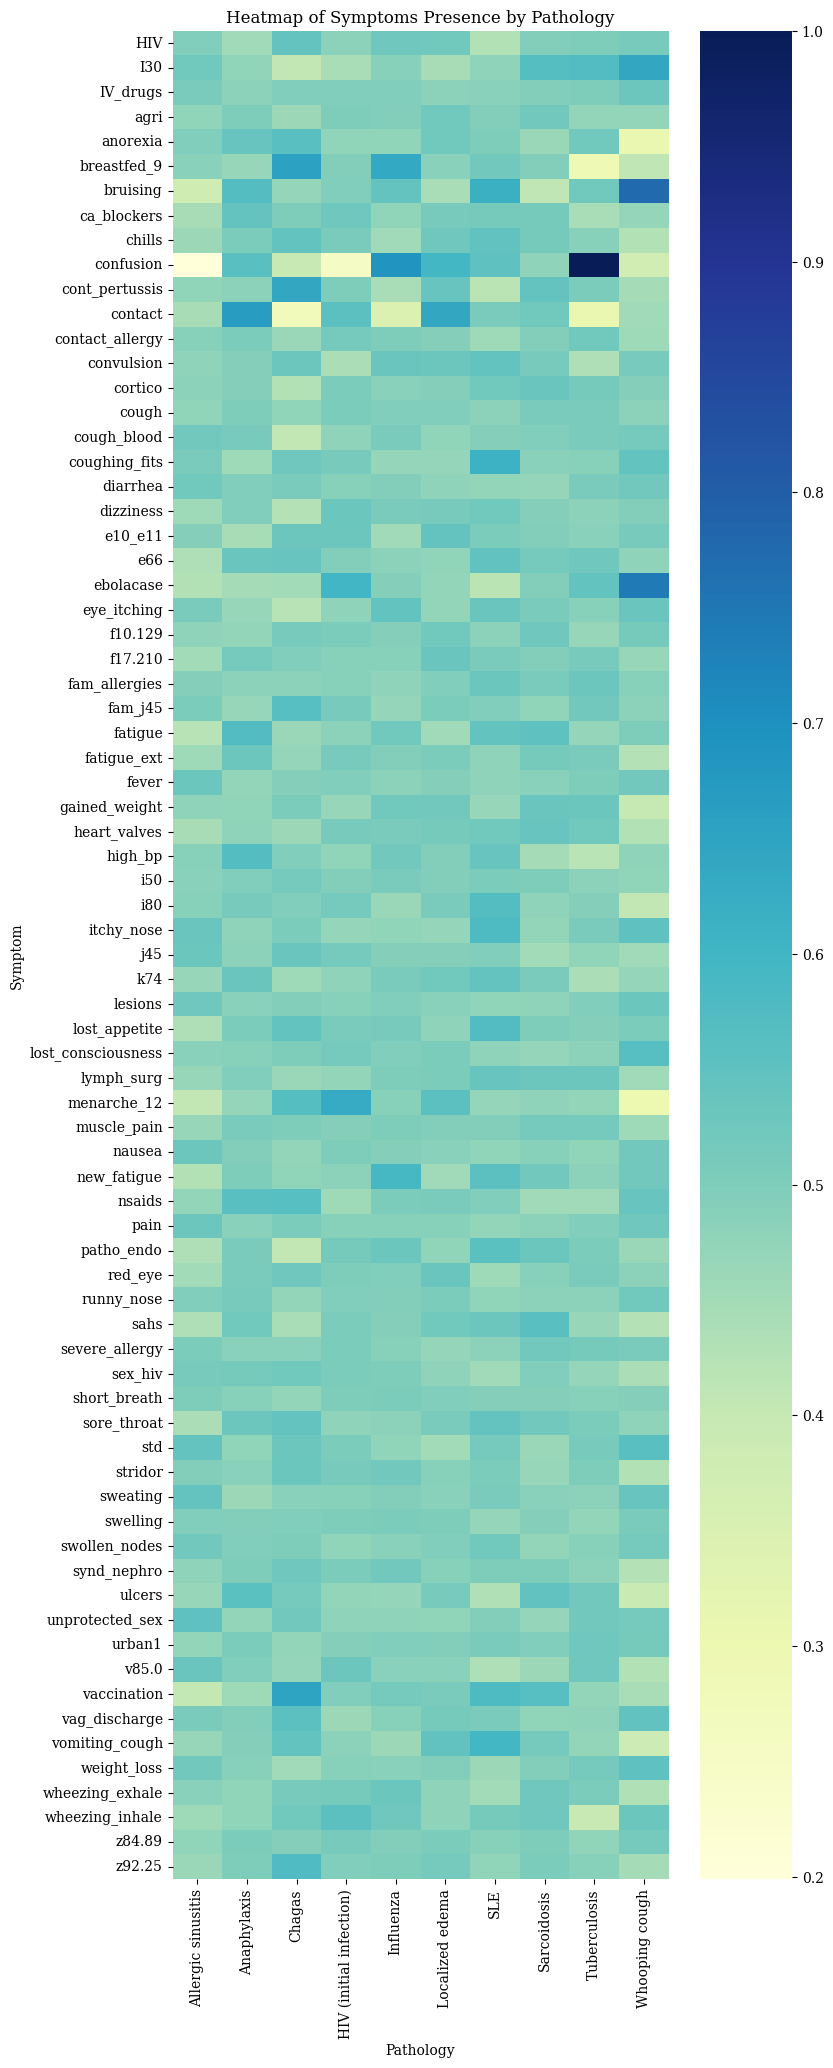

In [23]:
plt.figure(figsize=(8, 24))
sns.heatmap(normalized_pivot_table_e / np.max(normalized_pivot_table_e), annot=False, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Symptoms Presence by Pathology')
plt.ylabel('Symptom')
plt.xlabel('Pathology')
plt.show()